In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.linear_model import LogisticRegression, LinearRegression
# from mlxtend.plotting import plot_decision_regions
# import statistics
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus
from aix360.algorithms.lime import LimeTabularExplainer
from aix360.metrics import faithfulness_metric, monotonicity_metric
# print(pd.__version__)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
!pip install seaborn

Prepared for Techincal Produce Marketing Team at IBM

Prepared by Austin Cade Eovito

July 9, 2019

Exploratory Data Analysis and Modeling of the UCI Portuguese Banking Dataset
---------

Goal:

    -Perform EDA to understand preliminary features, describe the data frame
    -Perform a Linear/Logistic Regression to find important features, correlation matrices, adj. R-squared, etc.
    -Explore features to find statistically significant statistics
    -Create a model to propely discriminate between output variable, i.e, term deposits (yes or no)
    -Find boundary space, use intermediate method CART, ID3 Tree, Support Vector Machine, Naive Bayes
    -Using boundary space, use advanced method such as a simple feed-forward network (CNN) of 1d vector
    -Explain features amongst models, which were useful, which were not
    -Graph the model, learning rate, etc.
    
Expectations:

    -All relevant information pertaining to the dataset, methods, and algorithims are properly cited and explained
    -Source code is bug-free and self-contained
    -Analysis is accurate and pertinent to task at hand
    
To understand this notebook, a user is expected:

    -Basic understanding of Linear Algebra and its applications (outer, inner product, etc.)
    -Basic understanding of descriptive statistics
    -Understanding of Object Oriented Programming
    
To run:

    -If on Unix or Linux, press 'cmd' + 'spacebar' to open the search bar, type 'terminal' and hit enter
    -In terminal, type 'which python', to check which python you are currently running
    -If in python 3, type 'pip install jupyter lab pandas numpy tensorflow'
    

![alt text](bank.jpg)







The dataset used in this notebook can be found at: https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing/machine-learning-databases/00222/

The source for this information is: 

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

It is suggested to read the original paper by Moro et al. to understand the dataset, as well as the goals of the paper. 

Below is the data set description via the UCI link denoted above:
----------------------------------------------------------------

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Therefore, we have 10 numeric features, and 11 categorical.

In [3]:
bank_data = pd.read_csv('bank-additional-full.csv', sep = ';')
#sep = ; because the data is seperated by 
bank_data2 = bank_data.copy()
bank_data2.info() # we have no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
bank_data2['y new'] = bank_data2.y.map(dict(yes=1, no=0)); #map yes and no to booleans
bank_data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [5]:
#lets obtain simple descriptive information
bank_data2.describe()
#only shows the numeric data


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y new
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
bank_data2.age.median()

38.0

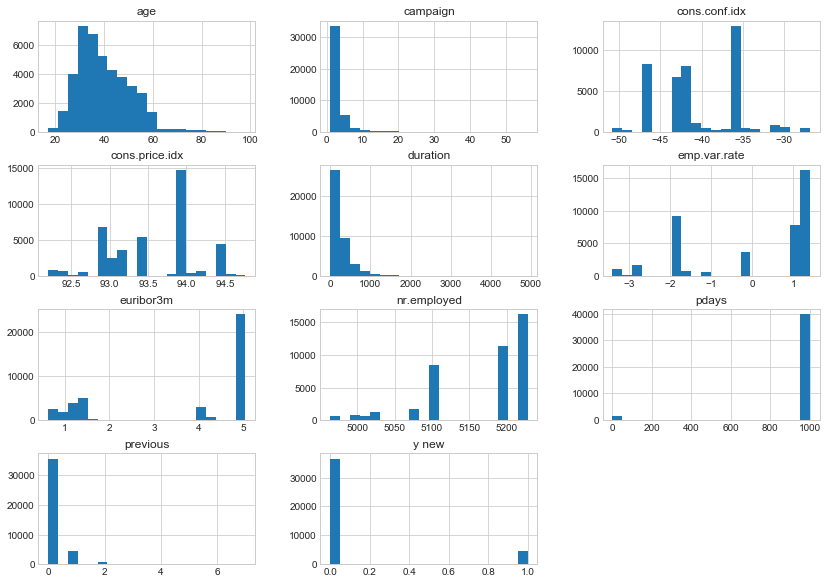

In [7]:
#numeric graphs

plt.style.use('seaborn-whitegrid')

bank_data2.hist(bins=20, figsize=(14,10)) #show distributions of numeric data
plt.show()

Looking at age, which is right-skewed, indicating that the distribution of the data clusters around lower age values, where the mean age is 40 years old, with a standard deviation of 10.

Also, looking at the descriptive statistics above, the output variable (whether a bank term was opened or not) is largely negative, indicating that the marketing camapaign can be improved, as the current conversion rate is around one in ten customers.

The next step is to create graphs for the data in order to look at patterns, trends, important features. After doing so, we will perform a Logistic Regression, which works well on binary classifications problem, we will use a unpruned categorize and regression tree (CART), and lastly an SVM.

From each of these classification techniques we will compare the training error, the test error, and the effect of using different features, if applicable. The goal is not to classify the unseen data; instead, it is to understand the latent information in the data, and to retarget the Portuguese Banking industries marketing campaigns to increase user conversion (opening a term with the bank) and retention (we do not have data on this per se, but can be latently evaluated).

In [8]:
#obtain the value counts for each feature

# bank_data2['age'].value_counts();
# bank_data2['job'].value_counts();



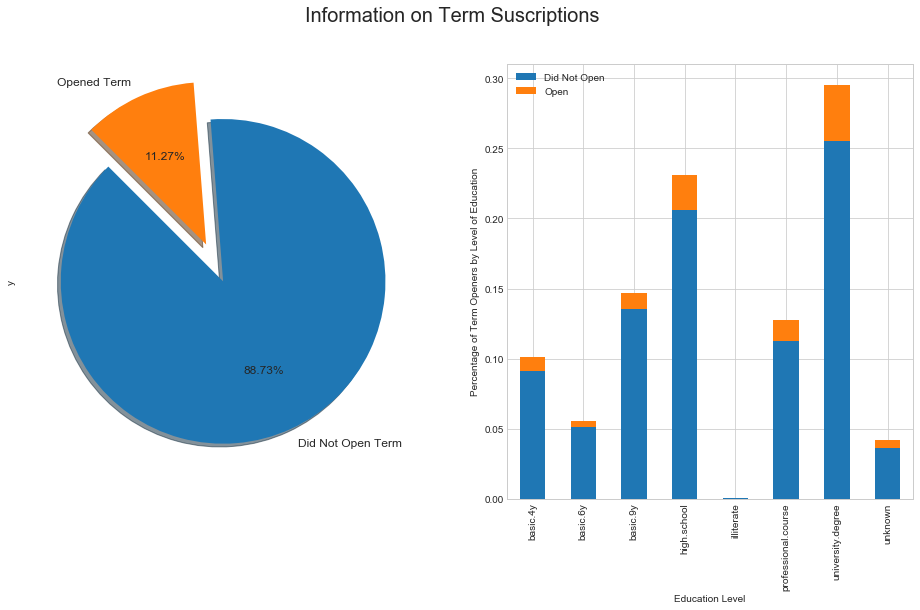

In [9]:
#preliminary analysis, exploring the data

labels = 'Did Not Open Term', 'Opened Term' 
fig, ax = plt.subplots(1,2,  figsize=(16,8))

#generate the pie chart
bank_data2["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                             labels=labels, fontsize=12, startangle=135)

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['education', 'y']).size().groupby(level=0).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True) #generates the bar chart on the left


# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Level of Education")
ax[1].set(xlabel="Education Level")
ax[1].legend(['Did Not Open', 'Open'])


The pie chart above relays information previously stated: 11.27% of all contacted individuals open a term.

Delving deeper, we are able to see that the highest point of contact, making up around 30% of all contact, are individuals who have a University Degree, and approximately 23% of the data, so together highschool students and university students are the most likely groups to be contacted. Therefore, Portuguese Banking institutions should partner with middle-schools (14-16 years old) in order to increase financial literacy in the younger generation. 

The Portugues Public-Private Partnership (PPPP) looks to increase the effective retention and financial literacy of those who use said financial institutions. 

Rather than needing to make future points of contact when individuals are already adults, integration of this partnership early will service both parties, i.e the bank as well as the populace of Portugal (those going into the education system).

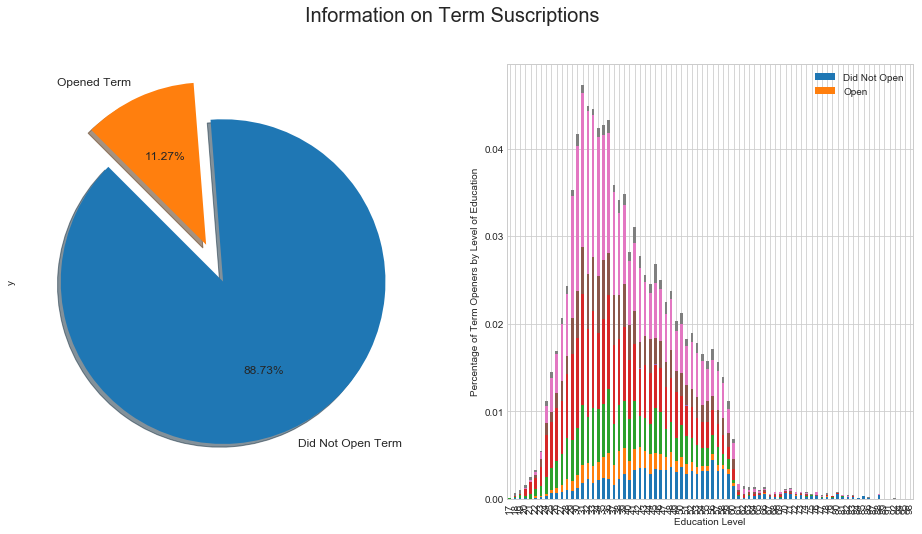

In [10]:
#preliminary analysis, exploring the data

labels = 'Did Not Open Term', 'Opened Term' 
fig, ax = plt.subplots(1,2,  figsize=(16,8))

#generate the pie chart
bank_data2["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                             labels=labels, fontsize=12, startangle=135)

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['age', 'education']).size().groupby(level=0).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True) #generates the bar chart on the left


# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Level of Education")
ax[1].set(xlabel="Education Level")
ax[1].legend(['Did Not Open', 'Open'])



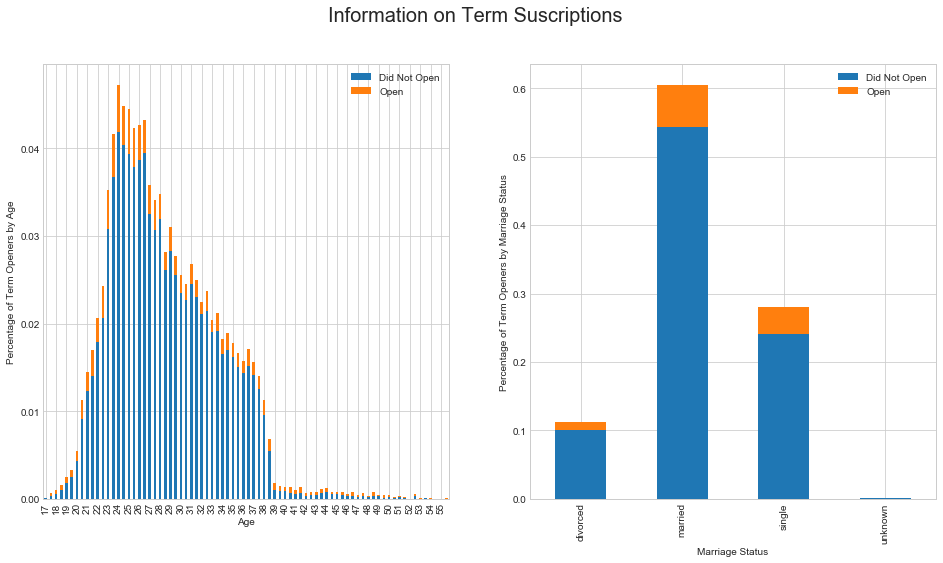

In [11]:
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['age', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Age")
ax[0].set(xlabel="Age")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])


df1 = bank_data2.groupby(['marital', 'y']).size().groupby(level=0).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Marriage Status")
ax[1].set(xlabel="Marriage Status")
ax[1].legend(['Did Not Open', 'Open'])

Approximately 5 percent of targeted individuals were of the 24 years old, and according to helinski.fi (http://www.helsinki.fi/science/xantippa/wee/weetext/wee234.html), the average age of marriage in Portugal is 24.5. 

Taking this a step further, approximately 60 percent of contacted indivudals are married, which correlates with the age state above. Current marketing is targeting older, married individuals, rather than younger, single individuals.

Once again, the PPPP should be intiated to work with students, for free, whilst in middle school and university in order to expand the current range of interested purchasers.

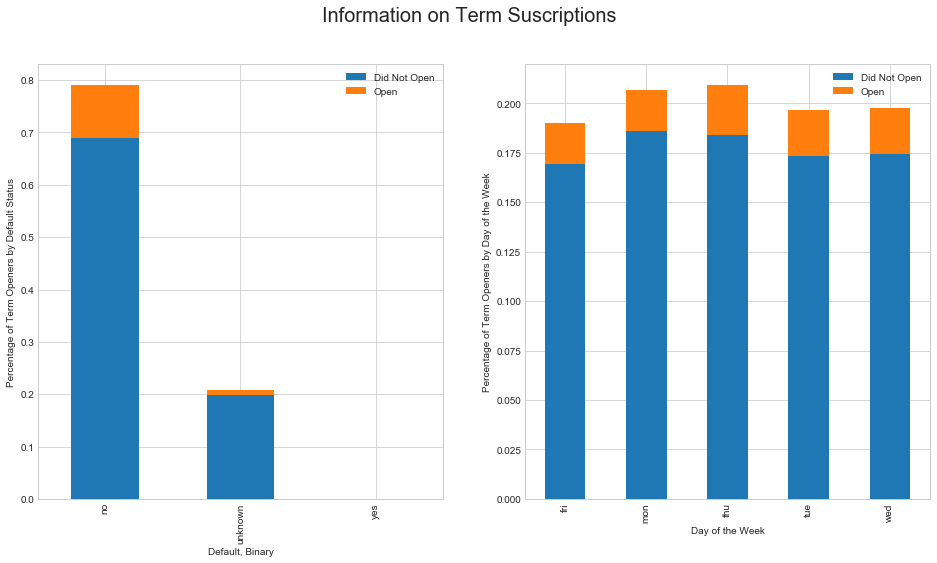

In [12]:
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['default', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Default Status")
ax[0].set(xlabel="Default, Binary")
ax[0].legend(['Did Not Open', 'Open'])

# ax[0].locator_params(axis='x', nbins=60)
df1 = bank_data2.groupby(['day_of_week', 'y']).size().groupby(level=0).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Day of the Week")
ax[1].set(xlabel="Day of the Week")
ax[1].legend(['Did Not Open', 'Open'])

Almost 80 percent of the targeted indiduals have never defaulted, and the day of the week appears to be uniformly distributed, indicating that these features may not be statistically significant (we will keep default).

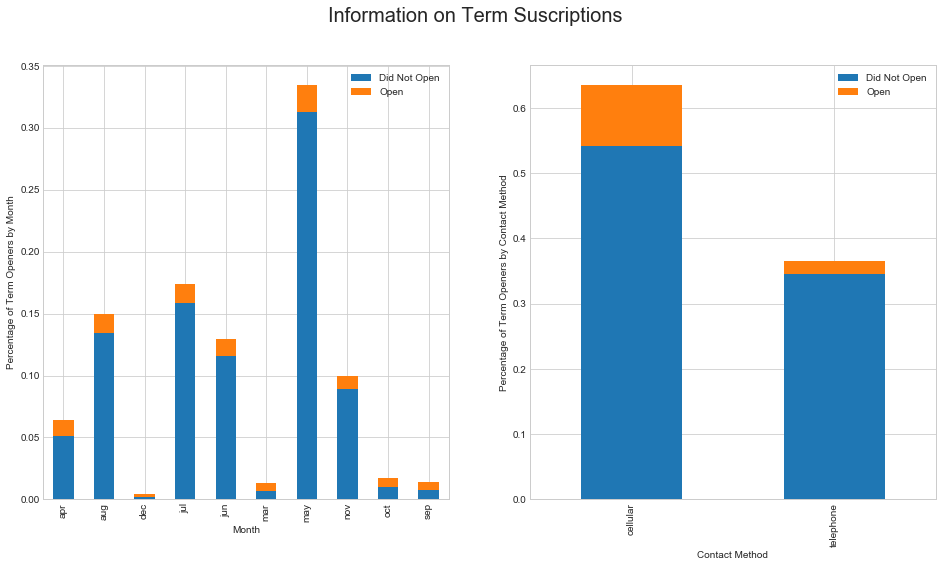

In [13]:
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['month', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Month")
ax[0].set(xlabel="Month")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])

df1 = bank_data2.groupby(['contact', 'y']).size().groupby(level=0).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Contact Method")
ax[1].set(xlabel="Contact Method")
ax[1].legend(['Did Not Open', 'Open'])

Approximately 35 percent of the data was generated in may, with the fall/winter times being severely neglected. More than half of all contact made was via cellular device, which also had a much larger conversion rate than the standard telephone method

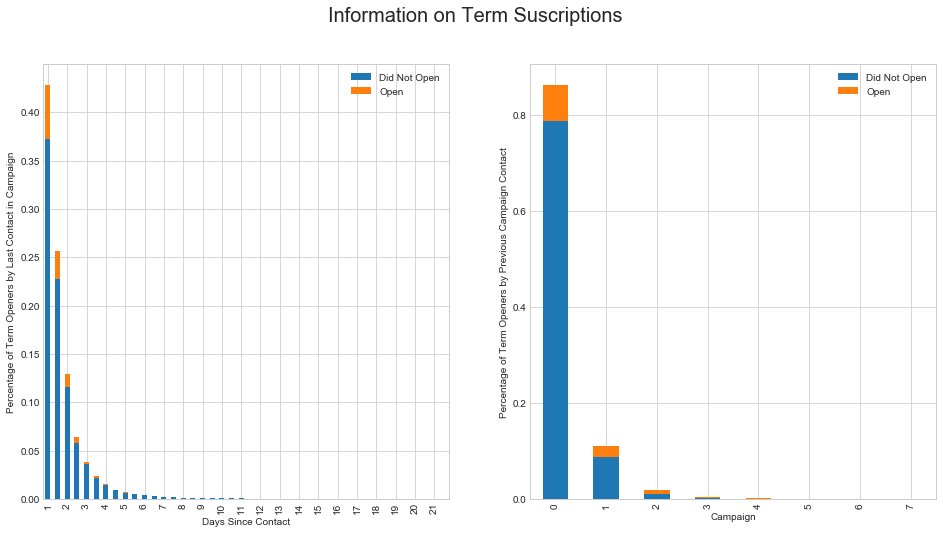

In [14]:
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['campaign', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Last Contact in Campaign")
ax[0].set(xlabel="Days Since Contact")
ax[0].locator_params(axis='x', nbins=30)
ax[0].legend(['Did Not Open', 'Open'])

df1 = bank_data2.groupby(['previous', 'y']).size().groupby(level=0).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Previous Campaign Contact")
ax[1].set(xlabel="Campaign")
ax[1].legend(['Did Not Open', 'Open'])

This data was dropped, as it is not statistically significant.

In [15]:
encoder = LabelEncoder()
#possible to do no cost eduaction at large high schools in order to properly get to them early
#positive impression, positive sentiment

dependent_var = bank_data2['y new']                                                                                         
encoded_df = bank_data2.copy()

encoded_df = encoded_df.drop(['y', 'y new'], axis=1)

#lets transform the data into encoded data
encoded_df = encoded_df.apply(encoder.fit_transform)
# encoded_df.head()
# dependent_var.head()
# scaled_encoded_df = encoded_df.apply(sk.preprocessing.scale)

In [16]:
encoded_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8


In [17]:
# import statsmodels.api as sm

# results = sm.OLS(dependent_var, scaled_encoded_df).fit()
# print(results.summary())

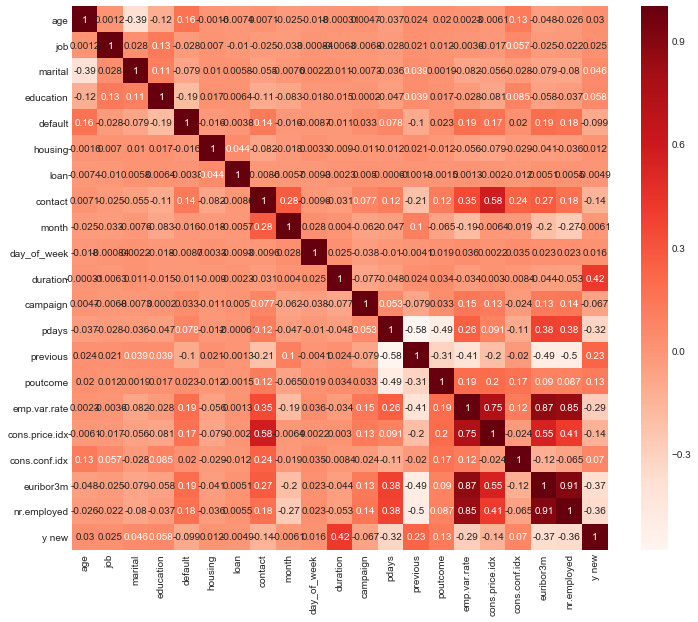

In [18]:
train_len = int(.8*(bank_data2.shape[0]))

train_x, train_y = encoded_df[:train_len], dependent_var[:train_len]
test_x, test_y = encoded_df[train_len:], dependent_var[train_len:]

encoded_df2 = pd.concat([encoded_df, dependent_var], axis = 1)

plt.figure(figsize=(12,10))
cor = encoded_df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
cor_target = abs(cor["y new"])


#Selecting highly correlated features
relevant_features_pos = cor_target[cor_target>0.2]
# relevant_features_neg = cor_target[cor_target >= -0.1]
print(relevant_features_pos, '\n')
# print(relevant_features_neg, '\n')





duration        0.419889
pdays           0.320945
previous        0.230181
emp.var.rate    0.286833
euribor3m       0.368168
nr.employed     0.355135
y new           1.000000
Name: y new, dtype: float64 



In [20]:
feature_cors = encoded_df[['duration', 'pdays']].corr()
feature_cors1 = encoded_df[['euribor3m', 'nr.employed']].corr()
feature_cors2 = encoded_df[['job', 'marital']].corr()
feature_cors3 = encoded_df[['marital', 'age']].corr()
print(feature_cors,'\n \n', feature_cors1, '\n \n', feature_cors2, '\n \n', feature_cors3)

          duration    pdays
duration   1.00000 -0.04782
pdays     -0.04782  1.00000 
 
              euribor3m  nr.employed
euribor3m     1.000000     0.912401
nr.employed   0.912401     1.000000 
 
               job   marital
job      1.000000  0.027897
marital  0.027897  1.000000 
 
           marital       age
marital  1.000000 -0.389814
age     -0.389814  1.000000


In [21]:
#making sure there are still no null values


# encoded_df = encoded_df.drop(['cons.conf.idx', 'nr.employed', 'contact', 'default',  'day_of_week'
#                               ], axis = 1)
encoded_df = encoded_df.drop(['age', 'housing', 'loan', 'default',  'day_of_week'
                              ], axis = 1)
# 'pdays', 'previous', 'poutcome', 'euribor3m', 'cons.price.idx'
encoded_df.describe();
encoded_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null int64
cons.price.idx    41188 non-null int64
cons.conf.idx     41188 non-null int64
euribor3m         41188 non-null int64
nr.employed       41188 non-null int64
dtypes: int64(15)
memory usage: 4.7 MB


In [22]:
#shuffle the data randomly in place
# encoded_df = encoded_df.sample(frac=1).reset_index(drop=True)
# encoded_df.head()

In [23]:


print(bank_data2.shape) #x and y 

#lets find 80 percent of the data
train_len = int(.8*(bank_data2.shape[0]))
print(train_len)

train_x, train_y = encoded_df[:train_len], dependent_var[:train_len]
test_x, test_y = encoded_df[train_len:], dependent_var[train_len:]


log_reg = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 10000) #raise max iterations in order to force convergence

log_reg_trained = log_reg.fit(train_x, train_y)

(41188, 22)
32950


In [24]:
log_reg.score(train_x, train_y)

train_pred_ly = log_reg.predict(train_x)

print('Logistic Regression Training Score:', log_reg.score(train_x, train_y))
print('Logistic Regression Training Accuracy:', sk.metrics.accuracy_score(train_y, train_pred_ly))

test_pred_ly = log_reg.predict(test_x)

print('Logistic Regression Test Score:', log_reg.score(test_x, test_y))
print('Logistic Regression Test Accuracy:', sk.metrics.accuracy_score(test_y, test_pred_ly))

#focus on this for the GLOBAL explanation of the model 
print(log_reg.coef_)
# logit = log(p/1 - (p))

Logistic Regression Training Score: 0.9412139605462823
Logistic Regression Training Accuracy: 0.9412139605462823
Logistic Regression Test Score: 0.697742170429716
Logistic Regression Test Accuracy: 0.697742170429716
[[ 0.00458001  0.09464887  0.0799282   0.42551743 -0.04932775  0.00536522
  -0.03555067 -0.36778287 -3.2275629  -2.54368823 -1.1636479  -0.06690959
  -0.04625677  0.05793868  0.28900001]]


In [25]:
train_x.shape[1]

15

In [26]:
class_names = [0, 1]

log_limeexplainer = LimeTabularExplainer(train_x.values, class_names=class_names, feature_names = train_x.columns )

print(f'the predicted class is: {log_reg_trained.predict_proba([train_x.values[0]])}')
print(f'The true class: {train_y.loc[0]}')

idx = 10

exp_log = log_limeexplainer.explain_instance(train_x.values[idx], log_reg_trained.predict_proba, num_features=6, labels=[0, 1])
print(f'Document id: {idx}')
# print('Predicted class =', class_names[log_reg_trained.predict(test_x.loc[idx])])
# print(f'True class: {class_names[test_y.loc[idx]]}'
# test_x.shape[0]

print ('Explanation for class %s' % class_names[0])
print ('\n'.join(map(str, exp_log.as_list(label=0))))
print ()
print ('Explanation for class %s' % class_names[1])
print ('\n'.join(map(str, exp_log.as_list(label=1))))

#keep in mind the relativity of the probabilities; depends on the feature importance
#could normalize the relative probability 
#e to a power is the linear combination of the features
#to diagnose which feature the model is paying attention you can print
#always a different model for the prediciton; different for surrounding data points as well
#GLRM weighted combination of rules versus weighted combination of features (other algorithms)
#SHAP is better than Lime in some ways; not based on local perturbations [proxy model]
#cover that the proxy model is not necessarily representative of the original model
#SHAP is very good for the instance 

/Users/eovito@ibm.com/miniconda3/envs/virt/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


the predicted class is: [[0.99135506 0.00864494]]
The true class: 0
Document id: 10
Explanation for class 0
('poutcome <= 1.00', -0.17309971012020053)
('previous <= 0.00', -0.1521985032743839)
('duration <= 100.00', 0.13038921808525245)
('7.00 < emp.var.rate <= 8.00', 0.09598273359106463)
('nr.employed <= 8.00', 0.06050641016320742)
('17.00 < cons.price.idx <= 18.00', 0.038656681989028704)

Explanation for class 1
('poutcome <= 1.00', 0.17309971012020053)
('previous <= 0.00', 0.1521985032743839)
('duration <= 100.00', -0.13038921808525245)
('7.00 < emp.var.rate <= 8.00', -0.09598273359106463)
('nr.employed <= 8.00', -0.06050641016320742)
('17.00 < cons.price.idx <= 18.00', -0.038656681989028704)


In [82]:
exp_log.show_in_notebook()

In [83]:
predicted_class = log_reg.predict(test_x.values[0].reshape(1,-1))[0]
le = exp_log.local_exp[predicted_class]

m = exp_log.as_map()

x = test_x.values[0]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]


base = np.zeros(x.shape[0])


print("Faithfulness: ", faithfulness_metric(log_reg, x, coefs, base))
print("Monotonity: ", monotonicity_metric(log_reg, x, coefs, base))

Faithfulness:  0.10333439522408781
Monotonity:  False


The test accuracy for logistic regression is 73 percent, meaning that the machine learning algorithim is able to correctly classify the data based on the features, 23% better than if we just guessed (binary variable, 50/50; 73 - 50 = 23).

In [84]:
#did not have enough time to prune the tree

dec_tree = tree.DecisionTreeClassifier() #no max depth, causes tree to create nodes until the leaves are pure
tree_model = dec_tree.fit(train_x, train_y)

dot_data = StringIO()

export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = [i for i in encoded_df.columns], class_names= ['0','1']) 

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DecisionTree.png')
# Image(graph.create_png())

Using a unpruned CART classifier, we are able to produce a decision tree using the GINI index for cross-entropy, we obtain 71 percent test accuracy. 

Feature engineering, pruning, and altering the depth, spread, and min_leaf_count could be used to improve this classifier.

In [63]:
train_pred_y = dec_tree.predict(train_x)

print('Decission Tree Training Score:', tree_model.score(train_x, train_y))
print('Decission Tree Training Accuracy:', sk.metrics.accuracy_score(train_y, train_pred_y))

test_pred_y = dec_tree.predict(test_x)

print('Decission Tree Test Score:', tree_model.score(test_x, test_y))
print('Decission Tree Test Accuracy:', sk.metrics.accuracy_score(test_y, test_pred_y))

Decission Tree Training Score: 0.9999089529590288
Decission Tree Training Accuracy: 0.9999089529590288
Decission Tree Test Score: 0.6246661811119204
Decission Tree Test Accuracy: 0.6246661811119204


In [85]:
train_x.shape

(32950, 15)

In [86]:
#data must be np.array
train_x, train_y = encoded_df[:train_len], dependent_var[:train_len]
test_x, test_y = encoded_df[train_len:], dependent_var[train_len:]

sv = svm.SVC(gamma = 'scale', decision_function_shape='ovo')
sv.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The n-dimensional SVM was able to obtain 70 percent test accuracy. A radar graph could be used to see which features contribute to the decision boundary the most.

Graphics can be created using a 2d slice of the data, however because of time contraints, I was unable to so.

In [87]:
train_pred_y = sv.predict(train_x)

print('Support Vector Machine Training Score:', sv.score(train_x, train_y))
print('Support Vector Machine Training Accuracy:', sk.metrics.accuracy_score(train_y, train_pred_y))

test_pred_y = sv.predict(test_x)

print('Support Vector Machine Test Score:', sv.score(test_x, test_y))
print('Support Vector Machine Test Accuracy:', sk.metrics.accuracy_score(test_y, test_pred_y))

Support Vector Machine Training Score: 0.9408801213960546
Support Vector Machine Training Accuracy: 0.9408801213960546
Support Vector Machine Test Score: 0.7008982762806506
Support Vector Machine Test Accuracy: 0.7008982762806506


Bibliography
--------
    
Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825-2830 (2011) 

Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/ [Online; accessed 2019-07-12].

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37 

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) 


Michael Waskom et al. mwaskom/seaborn: v0.8.1 (September 2017). Retrieved from:https://doi.org/10.5281/zenodo.883859

In [88]:
# SOURCE: https://github.com/IBM/lale/blob/master/examples/docs_guide_for_sklearn_users.ipynb

import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
import lale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBoost

from lale.lib.lale import NoOp, ConcatFeatures

# from sklearn.feature_selection import RFE
# from lale.lib.lale 
import lale.helpers
from aix360.algorithms.lime import LimeTabularExplainer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier as RF

#autowraps the previously imported stuff
lale.helpers.wrap_imported_operators()

from lale.lib.lale import HyperoptCV


# [end user [float], use-case [], SME]
# Techinal ability, use-case [manage-ment to end user], Need/SME
# f(x, y, z)


In [89]:
planned_pipe = lale.operators.make_union(NoOp, PCA) >> (Tree | LogisticRegression | XGBoost | RF) 

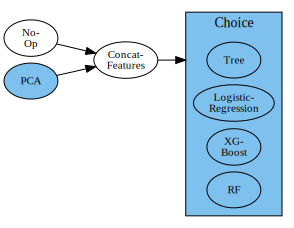

In [90]:
lale.helpers.to_graphviz(planned_pipe)


In [70]:
sorted(sk.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [71]:
#we are selecting the best pipeline for the model right now
train_x, train_y = encoded_df[:train_len], dependent_var[:train_len]
test_x, test_y = encoded_df[train_len:], dependent_var[train_len:]

pca_pipe_hyperopt = HyperoptCV(estimator=planned_pipe, cv=3, max_evals=3, scoring='accuracy')

#scoring = 'explainability algorithim'

pca_pipe_trained = pca_pipe_hyperopt.fit(train_x, train_y)
    

    

100%|██████████| 3/3 [01:56<00:00, 38.97s/it, best loss: -0.9394839349483964]


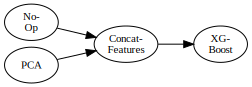

In [91]:
from lale.helpers import best_estimator
lale.helpers.to_graphviz(best_estimator(pca_pipe_trained))

In [92]:
from lale.pretty_print import ipython_display
ipython_display(best_estimator(pca_pipe_trained), show_imports=False)

```python
pca = PCA(svd_solver='full')
xg_boost = XGBoost(booster='gblinear', colsample_bylevel=0.8800094729886384, colsample_bytree=0.24347633774591215, learning_rate=0.4596285154827624, max_depth=20, min_child_weight=2, n_estimators=1412, reg_alpha=0.3292628550216524, reg_lambda=0.8707348588077812, subsample=0.605086288753513)
pipeline = (NoOp & pca) >> ConcatFeatures >> xg_boost
```

In [93]:
predicted = pca_pipe_trained.predict(test_x)
#not useful for classification
# print(f'R2 score {sk.metrics.r2_score(test_y, predicted)}')
print(f'Classification accuracy is {sk.metrics.accuracy_score(test_y, predicted)}')
print(f'Classfiication roc_auc is {sk.metrics.roc_auc_score(test_y, predicted)}')
# print(f'Classification F1 is {sk.metrics.f1_score(test_y, predicted)}')

Classification accuracy is 0.7209274095654286
Classfiication roc_auc is 0.568060902706572


In [94]:
class_names = [0, 1]

In [95]:
limeexplainer_pipe = LimeTabularExplainer(train_x.values, class_names=class_names, feature_names = train_x.columns, discretize_continuous = True)

In [96]:
print(type(limeexplainer))

<class 'aix360.algorithms.lime.lime_wrapper.LimeTabularExplainer'>


In [97]:
print(f'the predicted class is: {pca_pipe_trained.predict([train_x.values[0]])}')
print(f'The true class: {train_y.loc[0]}')

the predicted class is: [0]
The true class: 0


In [98]:
train_x.values[0]

array([  3,   1,   0,   1,   6, 261,   0,  26,   0,   1,   8,  18,  16,
       287,   8])

In [112]:
idx = 10

exp_pipe = limeexplainer_pipe.explain_instance(test_x.values[idx], best_estimator(pca_pipe_trained).predict_proba, num_features=11, labels=[0, 1])
# print(f'Document id: {idx}')
# print('Predicted class =', class_names[pca_pipe_trained.predict(test_x.loc[idx])])
# print(f'True class: {class_names[test_y.loc[idx]]}'
# test_x.shape[0]

In [113]:
#not working properly


print ('Explanation for class %s' % class_names[0])
print ('\n'.join(map(str, exp_pipe.as_list(label=0))))
print ()
print ('Explanation for class %s' % class_names[1])
print ('\n'.join(map(str, exp_pipe.as_list(label=1))))

Explanation for class 0
('175.00 < duration <= 314.00', 0.058849936875468266)
('euribor3m <= 271.00', -0.0336076845220555)
('poutcome <= 1.00', 0.019382489598534818)
('job <= 1.00', 0.007202042944801688)
('nr.employed <= 8.00', 0.005489498994178095)
('contact <= 0.00', 0.004570883616787846)
('education <= 2.00', -0.0034076803902865433)
('marital <= 1.00', -0.003250601034839865)
('previous > 0.00', 0.0030296890105387547)
('0.00 < campaign <= 1.00', -0.002642931931881257)
('pdays <= 26.00', 0.0)

Explanation for class 1
('175.00 < duration <= 314.00', -0.05884993579885981)
('euribor3m <= 271.00', 0.03360768409757879)
('poutcome <= 1.00', -0.019382492090326567)
('job <= 1.00', -0.007202042410798801)
('nr.employed <= 8.00', -0.005489499035447223)
('contact <= 0.00', -0.004570883438299717)
('education <= 2.00', 0.003407680955750284)
('marital <= 1.00', 0.003250600626459614)
('previous > 0.00', -0.0030296905201907718)
('0.00 < campaign <= 1.00', 0.0026429315827988468)
('pdays <= 26.00', 0.0)

In [101]:
exp.show_in_notebook(show_table=True, show_all=False)

In [102]:
# i = np.random.randint(0, test_x.shape[0])

predicted_class = pca_pipe_trained.predict(test_x.values[0].reshape(1,-1))[0]
le = exp.local_exp[predicted_class]

m = exp.as_map()

x = test_x.values[0]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]


base = np.zeros(x.shape[0])


print("Faithfulness: ", faithfulness_metric(best_estimator(pca_pipe_trained), x, coefs, base))
print("Monotoncity: ", monotonicity_metric(best_estimator(pca_pipe_trained), x, coefs, base))

Faithfulness:  -0.1267980712667747
Monotoncity:  False


In [103]:
# test_x

,job,marital,education,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32950,1,1,1,0,6,65,1,26,0,1,3,8,4,210,6
32951,9,2,6,0,6,66,3,26,1,0,3,8,4,210,6
32952,1,1,2,0,6,34,0,26,1,0,3,8,4,210,6
32953,1,2,5,0,6,333,0,26,0,1,3,8,4,210,6
32954,9,0,2,0,6,128,0,26,1,0,3,8,4,210,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,7,334,0,26,0,1,5,25,0,171,0
41184,1,1,5,0,7,383,0,26,0,1,5,25,0,171,0
41185,5,1,6,0,7,189,1,26,0,1,5,25,0,171,0
41186,9,1,5,0,7,442,0,26,0,1,5,25,0,171,0


In [1]:
import lale.datasets

/Users/eovito@ibm.com/miniconda3/envs/virt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
(train_x, train_y), (test_x, test_y) = lale.datasets.california_housing_df()

In [3]:
import sklearn 
print(sklearn.__version__)

0.22.1


In [4]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor as Tree
from lale.lib.lale import Hyperopt
import lale
import lale.helpers
lale.wrap_imported_operators()

/Users/eovito@ibm.com/miniconda3/envs/virt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/eovito@ibm.com/miniconda3/envs/virt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/eovito@ibm.com/miniconda3/envs/virt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: 